In [131]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time

In [132]:
df = pd.read_csv('processed_cleveland.csv',
                names =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [133]:
df_cat = df
# categorize by their target
df_cat.loc[df['target'] < 1, 'target'] = 0

df_cat.loc[df['target'] >= 1, 'target'] = 1
df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


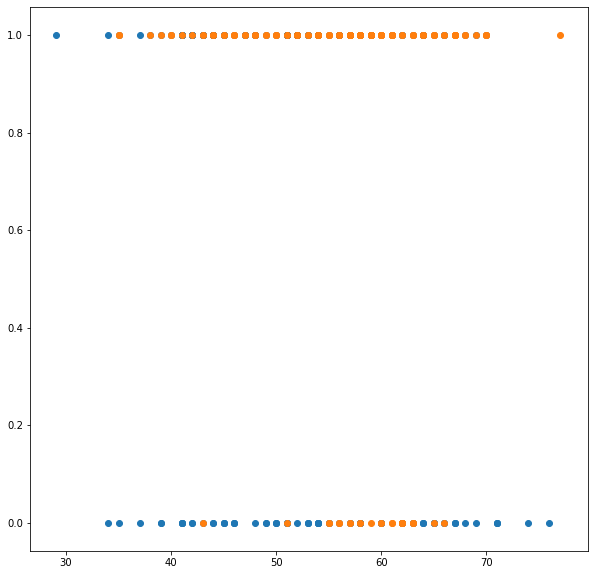

In [134]:
fig, ax = plt.subplots(figsize = (10,10))
df_zero = df_cat.loc[df_cat['target'] == 0]
df_one = df_cat.loc[df_cat['target'] == 1]

ax.scatter(df_zero['age'], df_zero['sex'])
ax.scatter(df_one['age'], df_one['sex'])

#plt.ylim(4, 7)
plt.show()

In [135]:
from sklearn.model_selection import train_test_split

X = df_cat[['age','fbs','cp','trestbps','thalach']]
y = df_cat['target']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 1)

In [136]:
X_train.head()
y_train.head()

170    1
192    1
168    1
42     0
90     0
Name: target, dtype: int64

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(X_train, y_train)
#import time
end_time = time.time()

print(end_time - start_time)

0.003988981246948242


In [138]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [139]:
y_test.head()

204    0
159    0
219    0
174    1
184    1
Name: target, dtype: int64

In [140]:
accuracy_score(y_test, y_pred)

0.6710526315789473

In [141]:
#knn_model.predict([(5, 3)])